In [1]:
from objetos import *
from function import *
import pandas as pd 
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
list_comp,attributos_=readFile(excel_file='Teste2.xlsx')

Component created named motor
Atribute named geometry linked to motor
Atribute named material linked to motor
Atribute named power linked to motor


In [3]:
links=createMatrix(attributes_list=attributos_)
links.shape

(3, 3, 2)

### Here there are 2 options:
- Generate random conections
- Generate manually connections

#### Randomly

In [11]:
createLinksRandom(matrix=links,attributes_list=attributos_)

array([[[ 0,  0],
        [15,  5],
        [23,  2]],

       [[15,  5],
        [ 0,  0],
        [25,  5]],

       [[23,  2],
        [25,  5],
        [ 0,  0]]])

#### Manually

In [5]:
# createLink(matrix=links,attribute1=attributos_[0], attribute2=attributos_[1],attribute_list=attributos_, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributos_[2], attribute2=attributos_[3],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[4], attribute2=attributos_[5],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[6], attribute2=attributos_[7],attribute_list=attributos_, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributos_[8], attribute2=attributos_[9],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[10], attribute2=attributos_[11],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[12], attribute2=attributos_[13],attribute_list=attributos_, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributos_[14], attribute2=attributos_[15],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[16], attribute2=attributos_[1],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[0], attribute2=attributos_[15],attribute_list=attributos_, time=1, risk=50 )
# createLink(matrix=links,attribute1=attributos_[1], attribute2=attributos_[12],attribute_list=attributos_, time=2, risk=100 )
# createLink(matrix=links,attribute1=attributos_[1], attribute2=attributos_[4],attribute_list=attributos_, time=2, risk=100 )
# links

## Creating Stop Conditions


In [12]:
Mov=Behaviour(name="Movement")
Mov.addCondition(attributos_[1])
Mov.addCondition(attributos_[2])
Mov.addCondition(attributos_[0])

Inf_Iteraction= Behaviour(name="teste")
behavi=[Mov,Inf_Iteraction]

Behaviour created named Movement
Created a condtion that material has to work for  Movement to continue working
Created a condtion that power has to work for  Movement to continue working
Created a condtion that geometry has to work for  Movement to continue working
Behaviour created named teste


In [ ]:
State_machine(components=list_comp,behaviour=behavi,link_matrix=links,attrs= attributos_,number_of_interaction=10)

In [14]:
df= analysis(path='Simulations/Simulation_6_12_2023_14_27/Analysis/')

In [15]:
result=countFailureMode(df=df)
result

,Attribute.Component,Mean Tick to Fail,material.motor,power.motor,geometry.motor
0,geometry.motor,1.7,0,2,8
1,material.motor,1.6,10,0,0
2,power.motor,1.5,0,9,1


Right now, think about other analysis:
- Graphos with color code
- Heatmap 



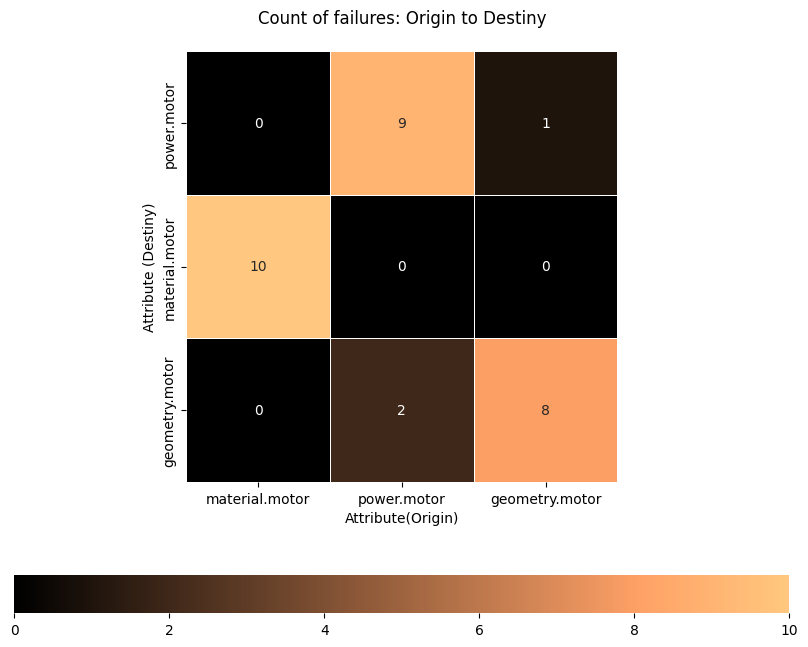

In [16]:
plot_heatmap(count_values=result)